<a href="https://colab.research.google.com/github/chinmayadash2017/Competition_ML_AI/blob/master/Course_1_Part_6_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


##### Improving Computer Vision Accuracy using Convolutions


In [23]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

In [24]:
training_images = training_images.reshape(60000,28,28,1)
training_images = training_images /255
test_images = test_images.reshape(10000,28,28,1)
test_images = test_images / 255

In [30]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
callbacks = myCallback()

In [31]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (28,28,1)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

In [32]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [34]:
model.fit(x=training_images, y=training_labels, batch_size=None, epochs=20, verbose=2, callbacks=[callbacks])

Epoch 1/20
1875/1875 - 4s - loss: 0.4475 - accuracy: 0.8372
Epoch 2/20
1875/1875 - 4s - loss: 0.2981 - accuracy: 0.8906
Epoch 3/20
1875/1875 - 4s - loss: 0.2515 - accuracy: 0.9068
Epoch 4/20
1875/1875 - 4s - loss: 0.2208 - accuracy: 0.9172
Epoch 5/20
1875/1875 - 4s - loss: 0.1962 - accuracy: 0.9258
Epoch 6/20
1875/1875 - 4s - loss: 0.1712 - accuracy: 0.9364
Epoch 7/20
1875/1875 - 4s - loss: 0.1514 - accuracy: 0.9429
Epoch 8/20
1875/1875 - 4s - loss: 0.1324 - accuracy: 0.9498
Epoch 9/20

Reached 95% accuracy so cancelling training!
1875/1875 - 4s - loss: 0.1170 - accuracy: 0.9566


In [35]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2724 - accuracy: 0.9082


[0.27236005663871765, 0.9082000255584717]

In [36]:
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]

In [37]:
layer_outputs

[<tf.Tensor 'conv2d_4/Relu:0' shape=(None, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_4/MaxPool:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_5/Relu:0' shape=(None, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_5/MaxPool:0' shape=(None, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten_2/Reshape:0' shape=(None, 1600) dtype=float32>,
 <tf.Tensor 'dense_4/Relu:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_5/Softmax:0' shape=(None, 10) dtype=float32>]

In [11]:
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

In [13]:
image_pred = activation_model.predict(test_images[1].reshape(1, 28, 28, 1))

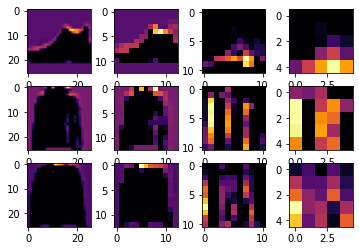

In [19]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=6
THIRD_IMAGE=25
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)